In [5]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

from pandarallel import pandarallel
pandarallel.initialize()

import glob
pd.set_option("display.max_columns", 999)

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib

INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


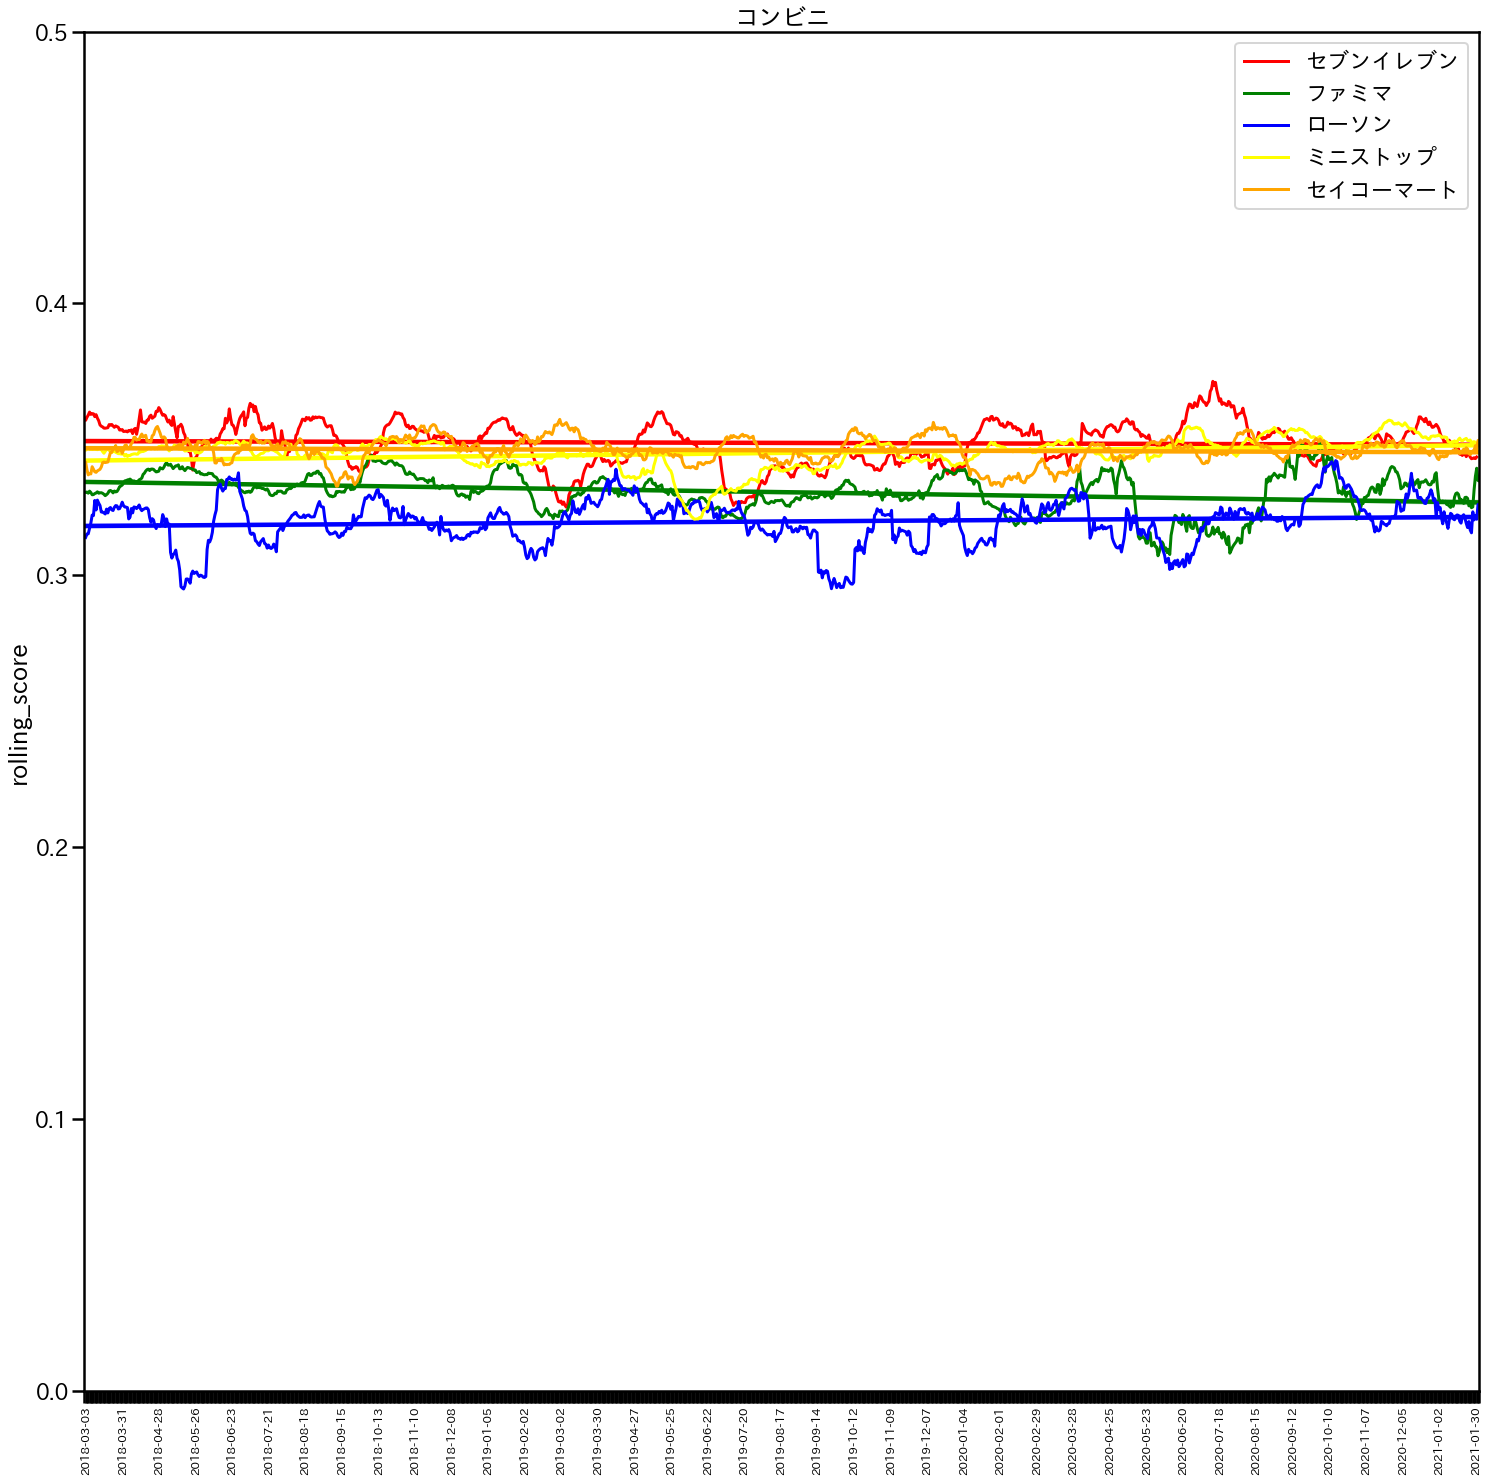

In [6]:
sns.set_context("poster")
plt.figure(figsize=(25, 25))

for term, color in [("セブンイレブン", "red"), ("ファミマ", "green"), ("ローソン", "blue"), ('ミニストップ', "yellow"),  ("セイコーマート", "orange")]:
    tmp = pd.read_csv(f"../var/{term}.csv",  error_bad_lines=False,lineterminator='\n')
    # tmp = tmp[tmp.date >= "2013-09-01"]
    tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
    a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
    a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
    ax = sns.lineplot(data=a, x="date", y="rolling_score", label=term,  color=color)
    ax = sns.regplot(x=a.index, y="rolling_score", data=a, scatter=False, color=color)
    ax.set_xticklabels(a.date)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
ax.set_title("コンビニ")

for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()

In [2]:
sns.set_context("poster")
plt.figure(figsize=(25, 25))

for term in ["電通"]:
    tmp = pd.read_csv(f"../var/{term}.csv",  error_bad_lines=False,lineterminator='\n')
    # tmp = tmp[tmp.date >= "2013-09-01"]
    tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
    a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
    a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
    ax = sns.lineplot(data=a, x="date", y="rolling_score", label=term)
    ax = sns.regplot(x=a.index, y="rolling_score", data=a, scatter=False)
    ax.set_xticklabels(a.date)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
ax.set_title(term)

for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()

NameError: name 'sns' is not defined

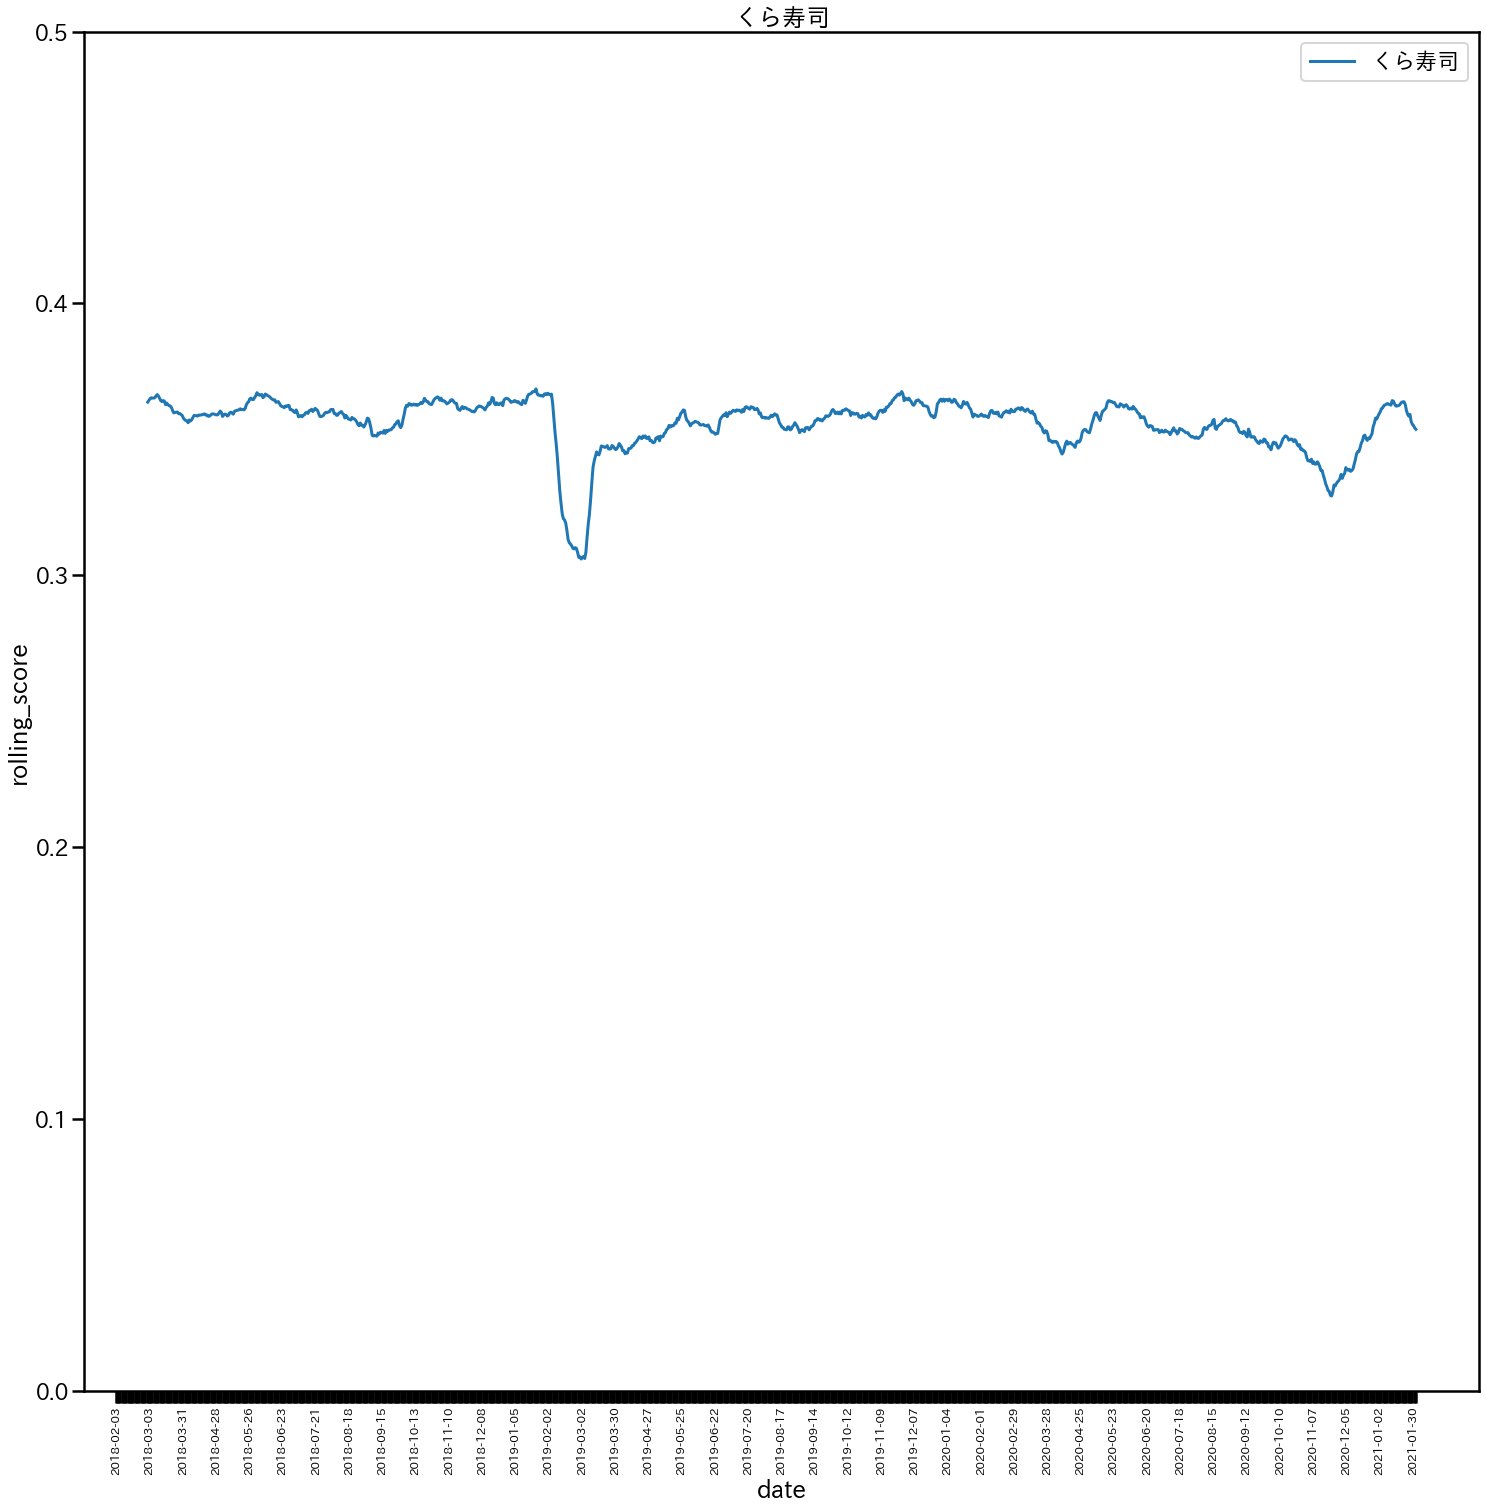

In [11]:
sns.set_context("poster")
plt.figure(figsize=(25, 25))

for term in ["くら寿司"]:
    tmp = pd.read_csv(f"../var/{term}.csv",  error_bad_lines=False,lineterminator='\n')
    tmp = tmp[tmp.date >= "2013-09-01"]
    tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
    a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
    a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
    ax = sns.lineplot(data=a, x="date", y="rolling_score", label=term)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
ax.set_title(term)

ax.set_xticklabels(a.date)
for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()

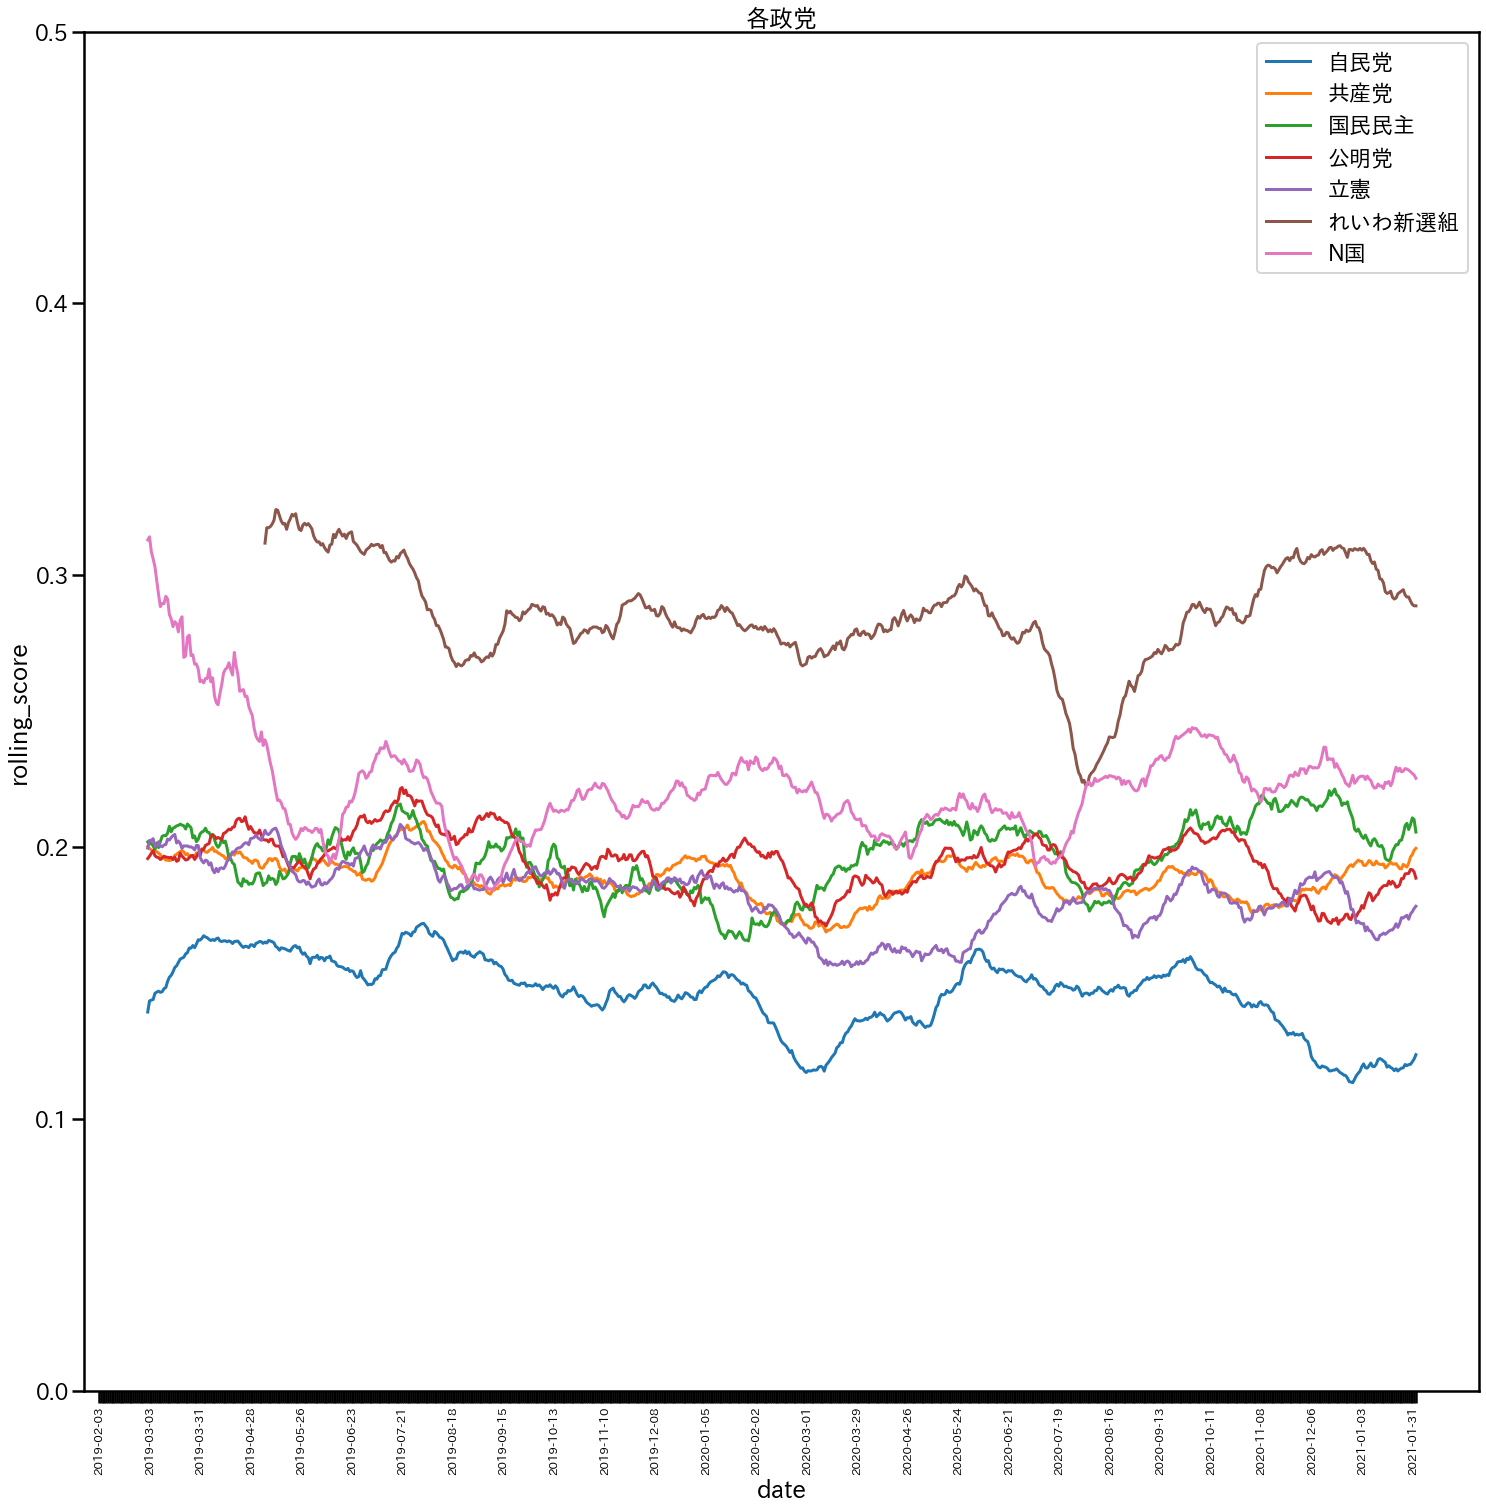

In [10]:
sns.set_context("poster")
plt.figure(figsize=(25, 25))

for term in ["自民党", "共産党", "国民民主", "公明党", "立憲", "れいわ新選組", "N国"]:
    tmp = pd.read_csv(f"../var/{term}.csv",  error_bad_lines=False,lineterminator='\n')
    tmp = tmp[tmp.date >= "2013-09-01"]
    tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
    a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
    a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
    ax = sns.lineplot(data=a, x="date", y="rolling_score", label=term)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
ax.set_title("各政党")

ax.set_xticklabels(a.date)
for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()

In [47]:
tmp = pd.read_csv(f"../var/プリキュア.csv",  error_bad_lines=False,lineterminator='\n')
tmp.drop_duplicates(subset=["tweet"]).sort_values(by=["score"], ascending=False).tail(30)

,date,time,username,tweet,mentions,likes_count,score
223809,2018-09-10,07:05:06,onodocomo,プリキュアになれない苦しみ,[],3,-0.491240
206083,2019-02-03,08:59:24,mugi_nama,プリキュアわすれてた,[],0,-0.491256
90755,2016-12-11,08:51:56,pinchi2525,プリキュア見れなかったゾ,[],0,-0.491287
323414,2020-03-08,08:59:56,decimal1010re,プリキュアも作画怪しいな,[],0,-0.491290
306193,2020-12-29,00:57:54,soranorefrain,プリキュア見てなかったな,[],0,-0.491296
323762,2019-06-16,08:59:41,ninja_893,プリキュアなかった....,[],0,-0.491452
83671,2016-11-06,08:30:56,yuuhi_874,プリキュアなかった😭😭 せっかく起きたのに,[],0,-0.491826
109086,2017-09-17,08:55:44,hatosabure0309,プリキュア見損ねた,[],0,-0.491878
147815,2019-09-22,08:56:14,higuresou098,プリキュアほとんど見れなかった もうヤダ 最悪 鬱,[],0,-0.492001
171678,2017-02-19,08:58:35,candyland_ame,プリキュア観られなかった悲しみ,[],0,-0.492040


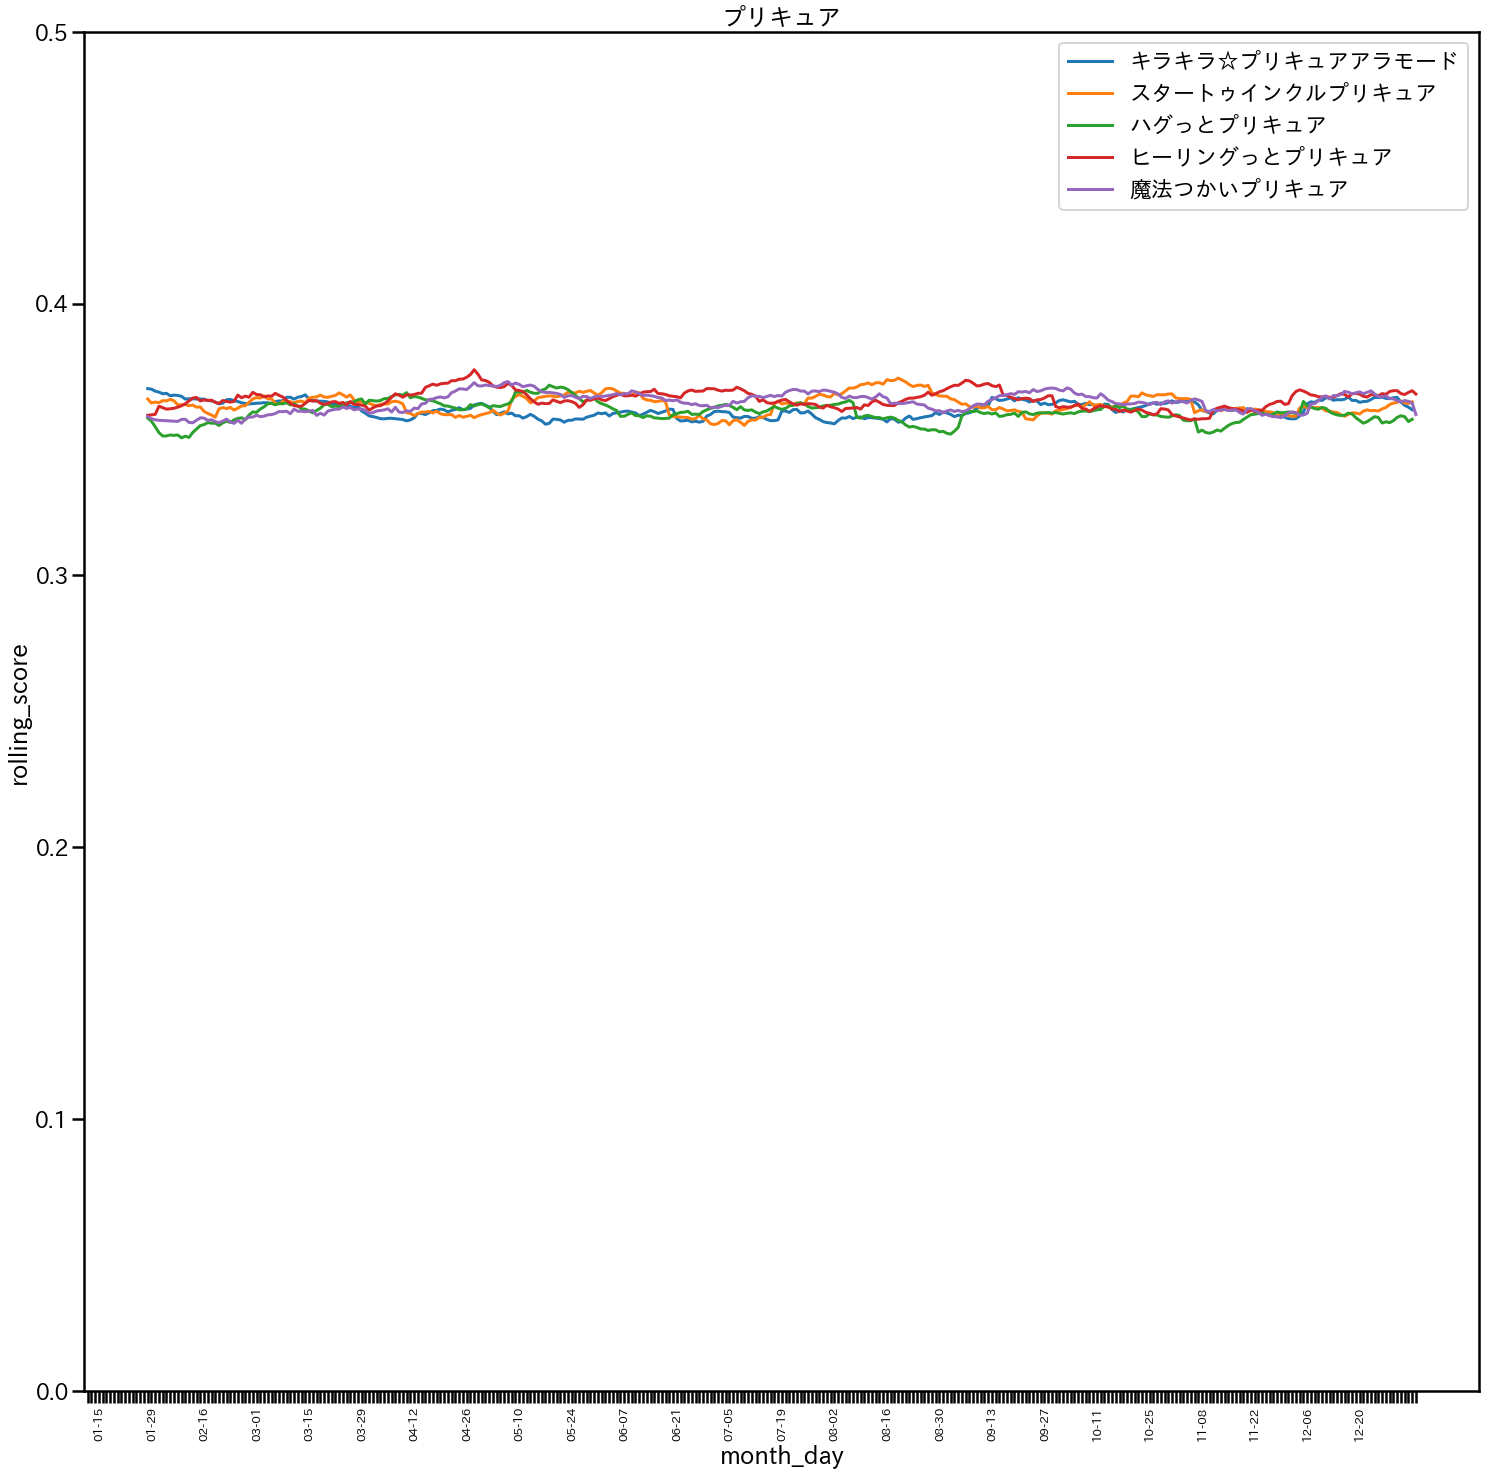

In [48]:
sns.set_context("poster")
plt.figure(figsize=(25, 25))


def title(x):
    if 201602 <= x <= 201701:
        return "魔法つかいプリキュア"
    elif 201702 <= x <= 201801:
        return "キラキラ☆プリキュアアラモード"
    elif 201802 <= x <= 201901:
        return "ハグっとプリキュア"
    elif 201902 <= x <= 202001:
        return "スタートゥインクルプリキュア"
    elif 202001 <= x <= 202101:
        return "ヒーリングっとプリキュア"
    else:
        return None
    
for term in ["プリキュア"]:
    tmp = pd.read_csv(f"../var/{term}.csv",  error_bad_lines=False,lineterminator='\n')
    tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y%m").astype(int)    
    tmp["month_day"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%m-%d")
    tmp["title"] = tmp.year_month.apply(title)
    for title, sub in tmp.groupby(by=["title"]):
        a = sub.groupby(by=["month_day"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
        a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
        ax = sns.lineplot(data=a, x="month_day", y="rolling_score", label=title)

    
    
    
    

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
ax.set_title(term)

ax.set_xticklabels(a.month_day)
for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%14 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()


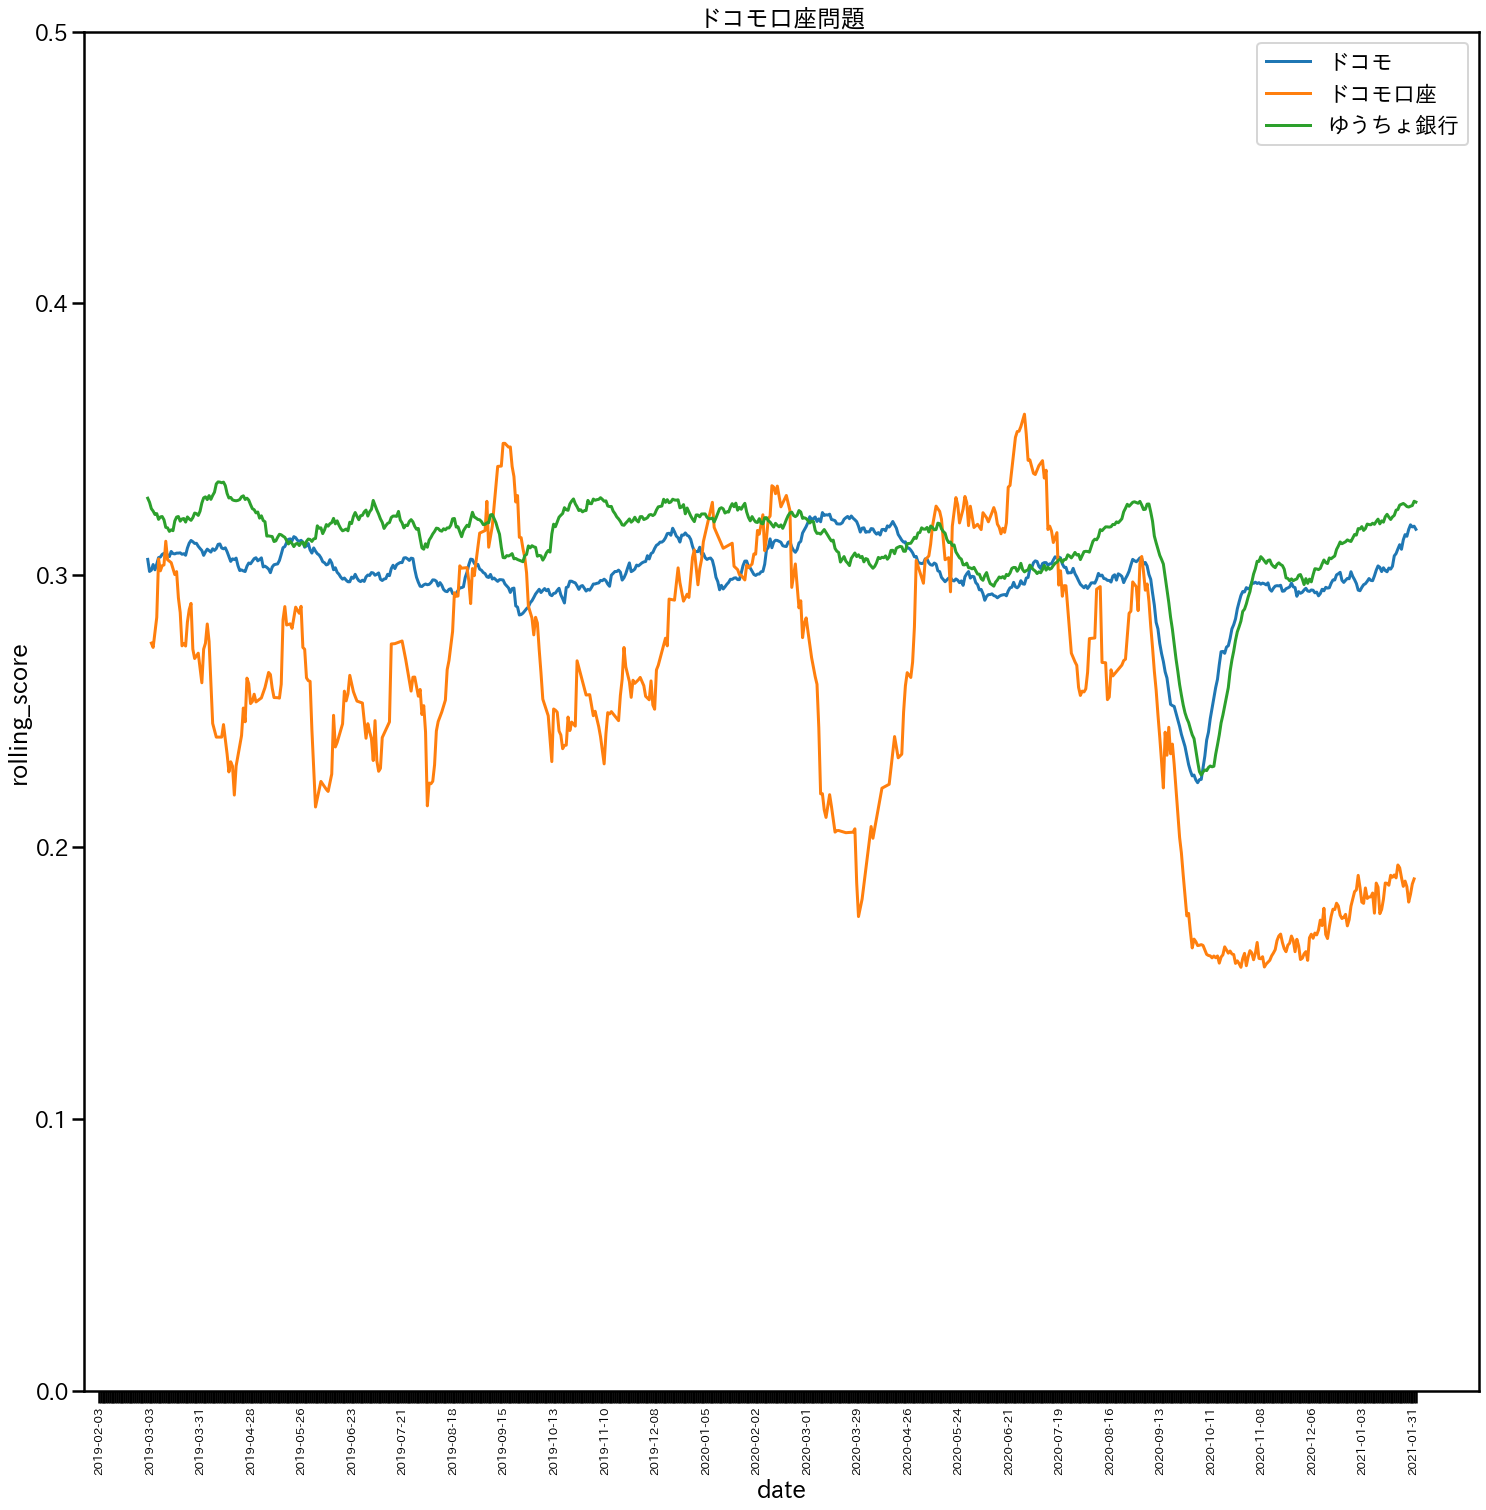

In [7]:
sns.set_context("poster")
plt.figure(figsize=(25, 25))

for term in ["ドコモ", "ドコモ口座", "ゆうちょ銀行"]:
    tmp = pd.read_csv(f"../var/{term}.csv",  error_bad_lines=False,lineterminator='\n')
    tmp["year_month"] = pd.to_datetime(tmp.date, errors="coerce").dt.strftime("%Y-%m")
    a = tmp.groupby(by=["date"]).agg(mean_score=("score", "mean"), sample_num=("score", "count")).reset_index()
    a["rolling_score"] = a.mean_score.rolling(28, win_type=None).mean()
    ax = sns.lineplot(data=a, x="date", y="rolling_score", label=term)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)
ax.set(ylim=(0, 0.5))
ax.set_title("ドコモ口座問題")

ax.set_xticklabels(a.date)
for idx, lbl in enumerate(ax.get_xticklabels()):
    if idx%28 == 0:
        lbl.set_visible(True)
    else:
        lbl.set_visible(False)
        
plt.show()